Exercise Sheet 9
**Embedding: Self Organizing Maps (SOMs) and Locally Linear Embedding (LLE)**

The results are strongly affected by the choise of $\sigma$ and $\epsilon$ and the annealing regimes...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
uniform = np.random.uniform

exp = np.exp
argmin = np.argmin
dist = np.linalg.norm


**9.1: 1d Self-Organizing Map for 2d data**

(a)

In [2]:
# Generate p = 1000 data points that are uniformly distributed
# inside the rectangle that is x from [0, 2]x[0, 1]
toy_p = 1000 # higher number for better presentation
toy_d = 2
Toy = np.vstack((uniform(low=0, high=2, size=toy_p),
               uniform(low=0, high=1, size=toy_p)))
# toy shape = (2, 1000)


(b)

In [3]:
# Implement a one-dimensional Self-Organizing Map
# (Kohonen network, online algorithm for SOMs)
# using a Gaussian neighborhood function

def h_pq(a, b, s):
    return exp(-(dist(a-b)**2)/(2*(s**2)))

def online_SOM(x_array, w_array, n_M, n_dim,
               sigma, epsilon, s_annealing, e_annealing, n_epoch):
    x_array = np.copy(x_array)
    w_array = np.copy(w_array)
    if np.shape(x_array)[1] < np.shape(x_array)[0]:
        x_array = x_array.T
    
    # shuffling x_array
    np.random.shuffle(x_array.T)
    
    n_x = np.shape(x_array)[1]
    x_dim = np.shape(x_array)[0]

    w_progress = np.zeros(shape=(n_x*n_epoch, x_dim, n_M))
    
    for i_e in range(n_epoch):
        for i_x in range(n_x):
            x = x_array[:, i_x].reshape((x_dim, 1))

#             if i_x + (i_e*n_x) > n_x/4:
            if i_e >= 1:
                epsilon *= e_annealing
            sigma *= s_annealing
            if epsilon < 1e-4:
                print('min epsilon reached for m=', n_M)
                return w_array, w_progress
            
            # recording the process
            w_progress[i_x + (i_e*n_x)] = w_array

            # the actual algorithm
            i_p = argmin(dist((x-w_array), axis=0))
            w_p = w_array[:, i_p].reshape((x_dim, 1))
            for i_q in range(n_M):
                w_q = w_array[:, i_q].reshape((x_dim, 1))
                d_w_q = epsilon * h_pq(w_p, w_q, sigma) * (x - w_q)
                w_array[:, i_q] = (d_w_q + w_q).reshape(x_dim)
    print(sigma, epsilon)
    return w_array, w_progress


doing it for M = 4
3.035412572112661e-06 0.12175303096296591
doing it for M = 8
3.035412572112661e-06 0.12175303096296591
doing it for M = 16
3.035412572112661e-06 0.12175303096296591
doing it for M = 32
3.035412572112661e-06 0.12175303096296591
doing it for M = 64
3.035412572112661e-06 0.12175303096296591
doing it for M = 128
3.035412572112661e-06 0.12175303096296591


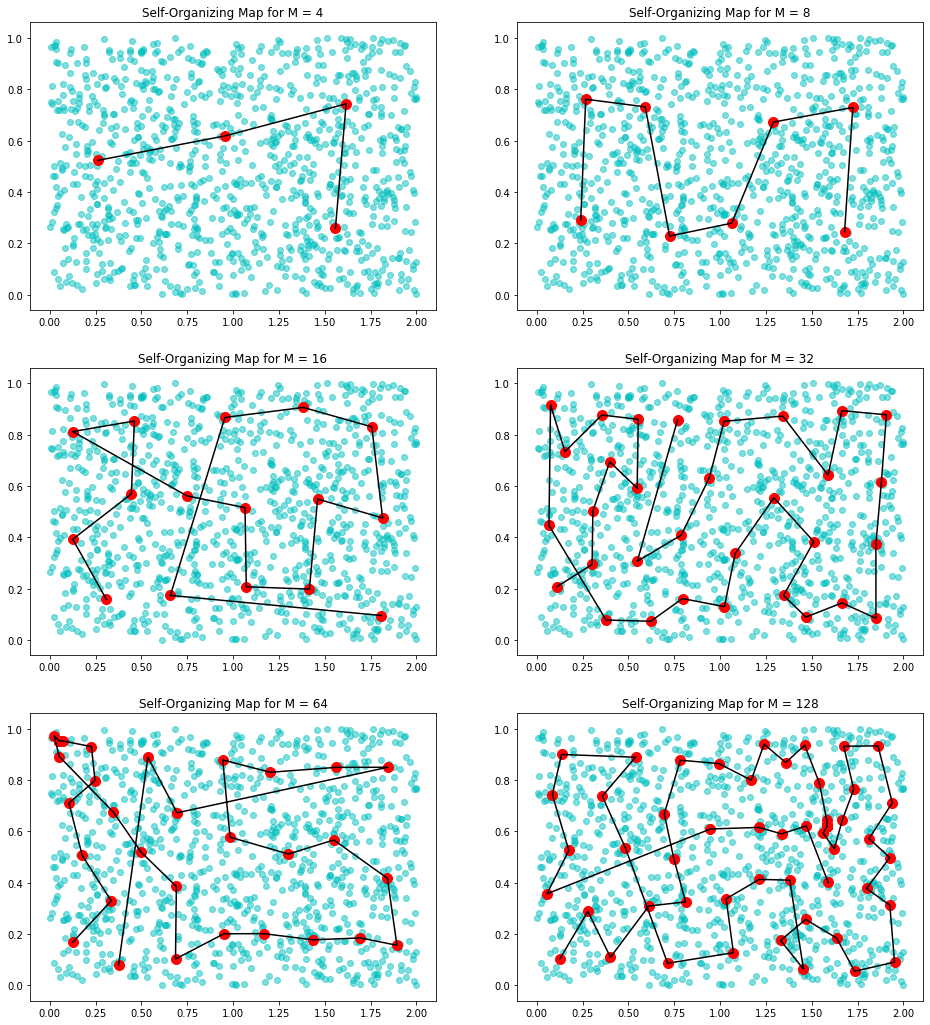

In [4]:
M_list = [4, 8, 16, 32, 64, 128]

m_len = len(M_list)
plt.figure(figsize=(16, 6*int(m_len/2)))
for i_m, m in enumerate(M_list):
    print('doing it for M =', m)
    
    # initializing the weights
    toy_mean = Toy.mean(axis=1).reshape((toy_d, 1))
    w_array = toy_mean + uniform(low=-0.25, high=0.25, size=(toy_d, m)) # random
#     w_array = np.array([np.zeros(m)+0.5, np.linspace(0, 2, m)]) # informed
    weights, recordings = online_SOM(Toy, w_array, m, 1, 0.5, 0.9, 0.998, 0.9996, 6)

    # plotting
    plt.subplot(int(m_len/2), 2, i_m+1)
    plt.title('Self-Organizing Map for M = {0}'.format(m))
    plt.scatter(Toy[0], Toy[1], color='c',alpha=0.5)
    # plt.plot(recordings[:, 0, :], recordings[:, 1, :])
    plt.scatter(weights[0], weights[1], s=100, c='r')
    
#     link_list = []
#     for i_k in range(m):
#         dist_array = dist((weights[:, i_k].reshape((2,1))-weights), axis=0)
#         for n_k in range(1, m):
#             i_k_n = dist_array.argsort()[n_k]
#             if link_list.count(i_k_n) < 2 and link_list.count(i_k) < 2:
#                 link_list.append(i_k)
#                 link_list.append(i_k_n)
#                 k_array = np.array([i_k, i_k_n])
#                 plt.plot(weights[0, k_array], weights[1, k_array], color='k')

    # or
#     plot_array = dist((weights[:, 0].reshape((2,1))-weights), axis=0).argsort()
#     plt.plot(weights[0, plot_array], weights[1, plot_array], color='k')
    
    # or
    i_k_int = dist((np.zeros((2,1))-weights), axis=0).argsort()[0]
    link_list = [i_k_int]
    for i_link in range(m):
        for i_k_n in dist((weights[:, link_list[-1]].reshape((2,1))-weights),
                          axis=0).argsort()[0:]:
            if i_k_n not in link_list:
                link_list.append(i_k_n)
                break
    k_array = np.array(link_list)
    plt.plot(weights[0, k_array], weights[1, k_array], color='k')

plt.show()


**9.2: 1d Self-Organizing Maps for 3d data**

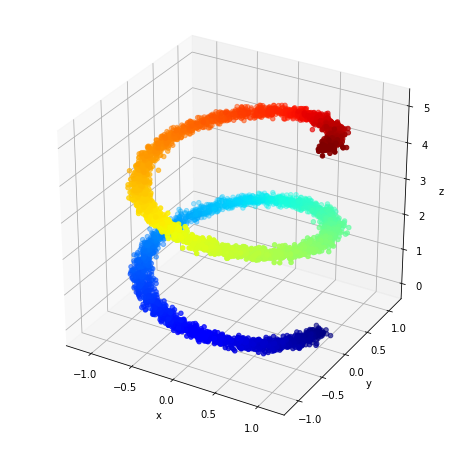

In [5]:
# Download and visualize the data contained in the file spiral.csv.
# It contains data described by three coordinates x,y,z.
spiral = np.genfromtxt('spiral.csv', delimiter=',',
                       skip_header=1, usecols = (1, 2, 3)).T
# spiral.shape = (3, 5000)
spiral_d = len(spiral) # dimension
spiral_p = spiral.shape[1] # samples

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(spiral[0], spiral[1], spiral[2],
           c=np.arange(len(spiral[2])), cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()


There is a obvious and significant order in the spiral data between the data points.

doing it for M = 16
min epsilon reached for m= 16
doing it for M = 32
min epsilon reached for m= 32
doing it for M = 64
min epsilon reached for m= 64
doing it for M = 128
min epsilon reached for m= 128


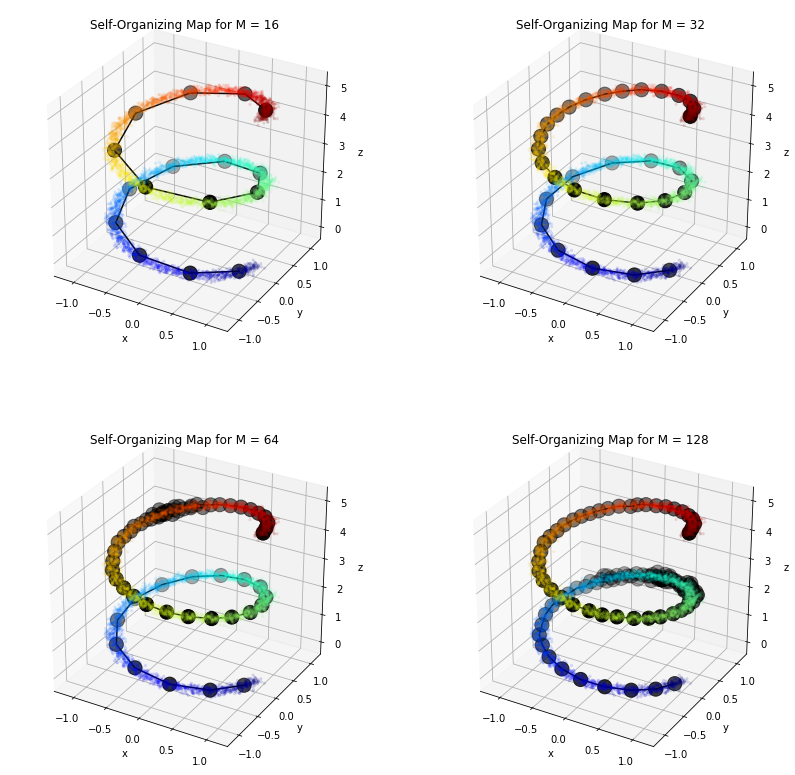

In [6]:
M_list = [16, 32, 64, 128]

m_len = len(M_list)
fig = plt.figure(figsize=(14, 7*int(m_len/2)))
for i_m, m in enumerate(M_list):
    print('doing it for M =', m)
    # initializing the weights
    w_array = np.array([np.zeros(m), np.zeros(m), np.linspace(0, 5, m, endpoint=True)])
    weights, recordings = online_SOM(spiral, w_array, m, 1, 0.7, 0.9, 0.998, 0.9996, 6)
    
    # plotting
    ax = fig.add_subplot(int(m_len/2), 2, i_m+1, projection='3d')
    ax.set_title('Self-Organizing Map for M = {0}'.format(m))
    ax.scatter(spiral[0], spiral[1], spiral[2],
               c=np.arange(len(spiral[2])), cmap='jet' ,alpha=0.1, s=5)
#     ax.plot(recordings[:, 0, :], recordings[:, 1, :], recordings[:, 2, :])
    ax.scatter(weights[0], weights[1], weights[2],
               s=200, c='k', edgecolor='k', marker='o')
    
    weights_z_arg_sorted = weights[2, :].argsort()
    sorted_weights = weights[:, weights_z_arg_sorted]
    ax.plot(sorted_weights[0], sorted_weights[1], sorted_weights[2], color='k')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
plt.show()


**9.3: 2d Self-Organizing Maps for 3d data**

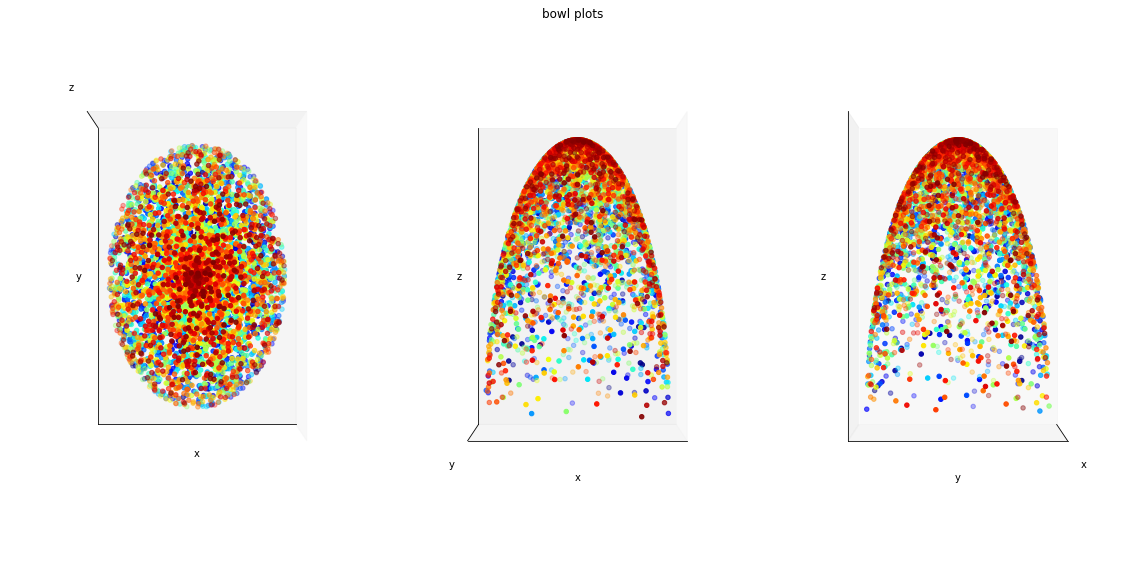

In [7]:
# Visualize the 3d-data in the file bowl.csv.
bowl = np.genfromtxt('bowl.csv', delimiter=',',
                       skip_header=1, usecols = (1, 2, 3)).T
# bowl.shape = (3, 5000)
fig = plt.figure(figsize=(16, 8))
for i_sub, angle in enumerate([[90, 90], [0, 90], [0, 0]]):
    plt.suptitle('bowl plots')
    ax = fig.add_subplot(1, 3, i_sub+1, projection='3d')
    ax.scatter(bowl[0], bowl[1], bowl[2],
               c=np.arange(len(spiral[2])), cmap='jet')
    ax.view_init(elev=angle[0], azim=angle[1])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
plt.tight_layout()
plt.show()


There is no visible order in the data.

doing it for M = 16
min epsilon reached for m= 16
doing it for M = 32
min epsilon reached for m= 32
doing it for M = 64
min epsilon reached for m= 64
doing it for M = 128
min epsilon reached for m= 128


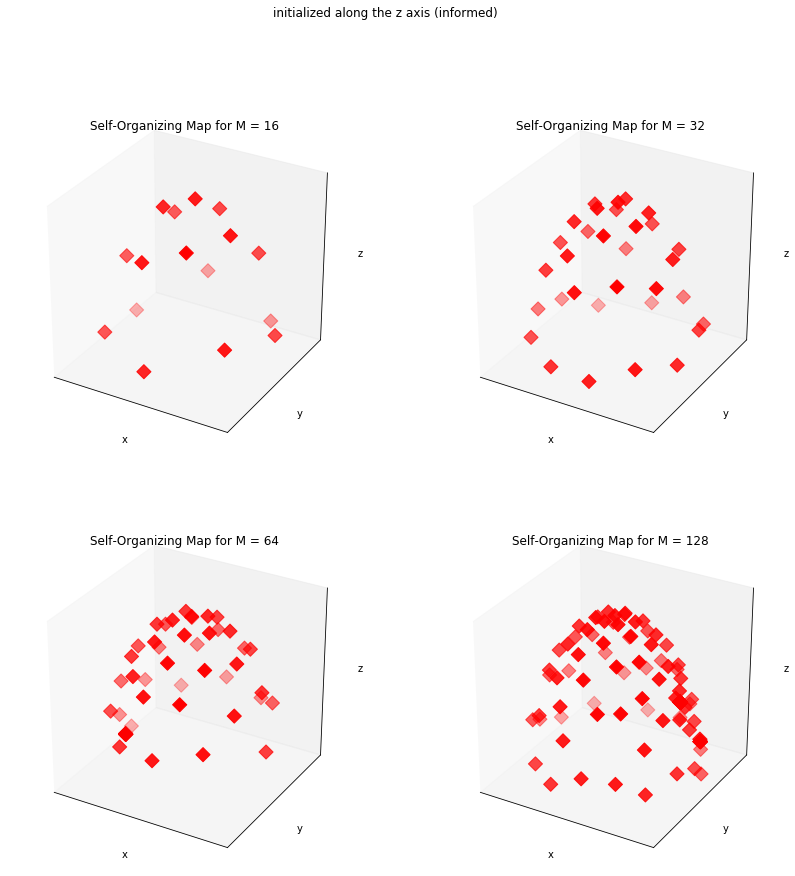

In [8]:
M_list = [16, 32, 64, 128]

m_len = len(M_list)
fig = plt.figure(figsize=(14, 7*int(m_len/2)))
plt.suptitle('initialized along the z axis (informed)')
for i_m, m in enumerate(M_list):
    print('doing it for M =', m)
    # initializing the weights
    aux_array = np.linspace(0, 1, m, endpoint=True)
    w_array = np.array([aux_array, aux_array, aux_array])
    weights, recordings = online_SOM(bowl, w_array, m, 1, 0.7, 0.9, 0.998, 0.9996, 6)
    
    # plotting
    ax = fig.add_subplot(int(m_len/2), 2, i_m+1, projection='3d')
    ax.set_title('Self-Organizing Map for M = {0}'.format(m))
    ax.scatter(weights[0], weights[1], weights[2], s=100, c='r', marker='D')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
plt.show()


doing it for M = 16
0.0067362626106031364 0.011106497128591908
doing it for M = 32
0.0067362626106031364 0.011106497128591908
doing it for M = 64
0.0067362626106031364 0.011106497128591908
doing it for M = 128
0.0067362626106031364 0.011106497128591908


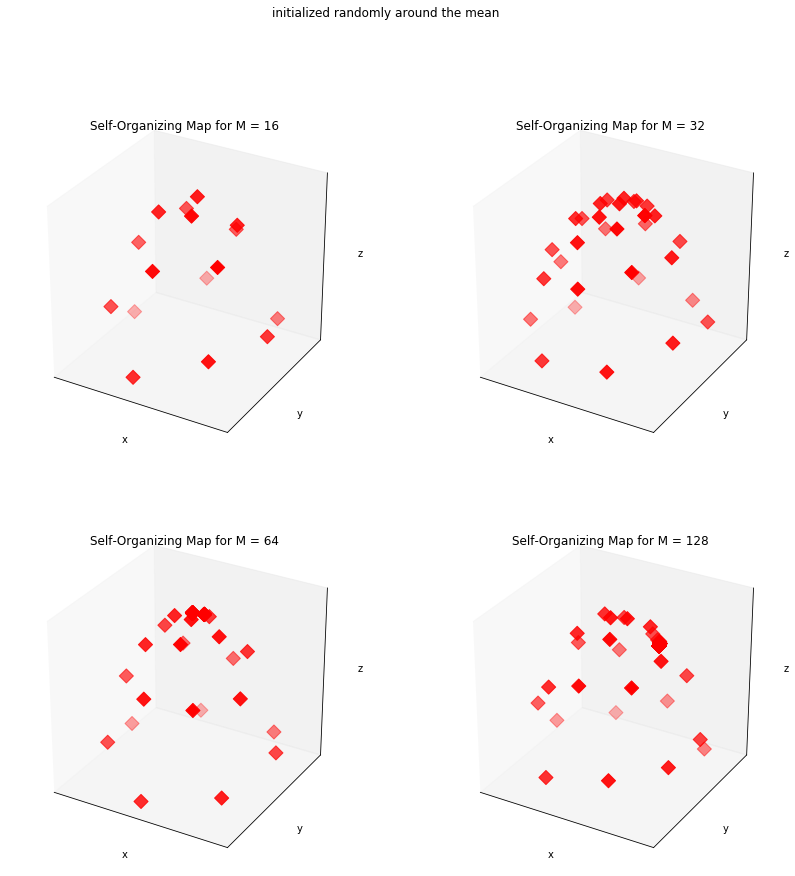

In [9]:
M_list = [16, 32, 64, 128]

m_len = len(M_list)
fig = plt.figure(figsize=(14, 7*int(m_len/2)))
plt.suptitle('initialized randomly around the mean')
for i_m, m in enumerate(M_list):
    print('doing it for M =', m)
    # initializing the weights
    bowl_mean = bowl.mean(axis=1).reshape((3, 1))
    w_array = bowl_mean + uniform(low=-0.25, high=0.25, size=(3, m))
    weights, recordings = online_SOM(bowl, w_array, m, 1, 1, 1, 0.9999, 0.9999, 10)
    
    # plotting
    ax = fig.add_subplot(int(m_len/2), 2, i_m+1, projection='3d')
    ax.set_title('Self-Organizing Map for M = {0}'.format(m))
    ax.scatter(weights[0], weights[1], weights[2], s=100, c='r', marker='D')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
plt.show()


**9.4: Locally Linear Embedding**

In [10]:
# Find an off-the-shelf implementation for Locally Linear Embedding (e.g. Scikit-Learn).
from sklearn import manifold, datasets


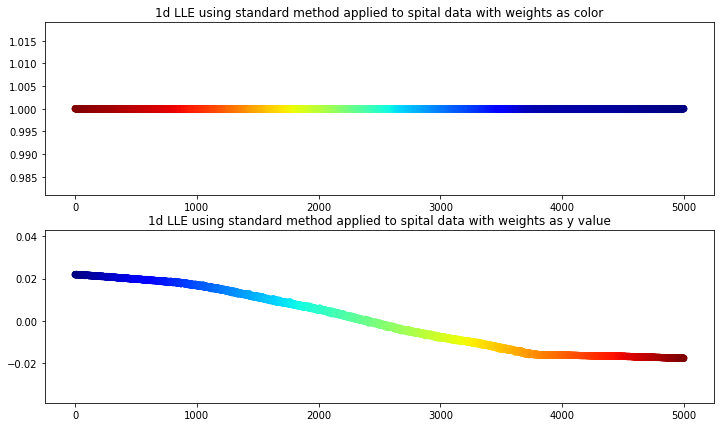

In [11]:
k_n = 10 # number of neighbors
n_dim = 1 # output dimension

LLE_method = manifold.LocallyLinearEmbedding(k_n, n_dim, method='standard')
spiral_1d = LLE_method.fit_transform(spiral.T).T
plt.figure(figsize=(12, 7))
plt.subplot(2, 1, 1)
plt.title('{0}d LLE using standard method applied to spital data with weights as color'.format(n_dim, 'standard'))
plt.scatter(np.arange(5000), np.ones(5000), c=spiral_1d[0,:], cmap='jet')
plt.subplot(2, 1, 2)
plt.title('{0}d LLE using standard method applied to spital data with weights as y value'.format(n_dim, 'standard'))
plt.scatter(np.arange(5000), spiral_1d[0,:], c=np.arange(5000), cmap='jet')
plt.show()


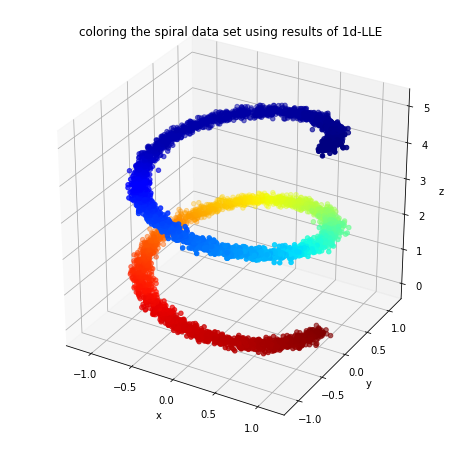

In [12]:
# using the results of the LLE for coloring:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(spiral[0], spiral[1], spiral[2],
           c=spiral_1d[0,:], cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('coloring the spiral data set using results of 1d-LLE' )
plt.show()


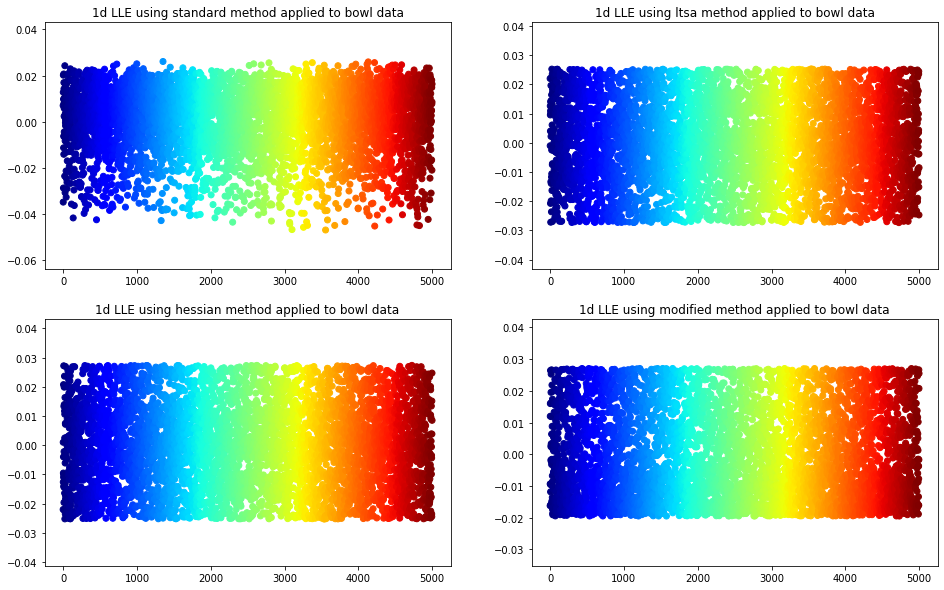

In [13]:
k_n = 10 # number of neighbors
n_dim = 1 # output dimension

plt.figure(figsize=(16, 10))
for isp, method in enumerate(['standard', 'ltsa', 'hessian', 'modified']):
    plt.subplot(2, 2, isp+1)
    LLE_method = manifold.LocallyLinearEmbedding(k_n, n_dim, method=method)
    bowl_1d = LLE_method.fit_transform(bowl.T).T
    plt.scatter(np.arange(5000), bowl_1d[0,:], c=np.arange(5000), cmap='jet')
    plt.title('{0}d LLE using {1} method applied to bowl data'.format(n_dim, method))
plt.show()


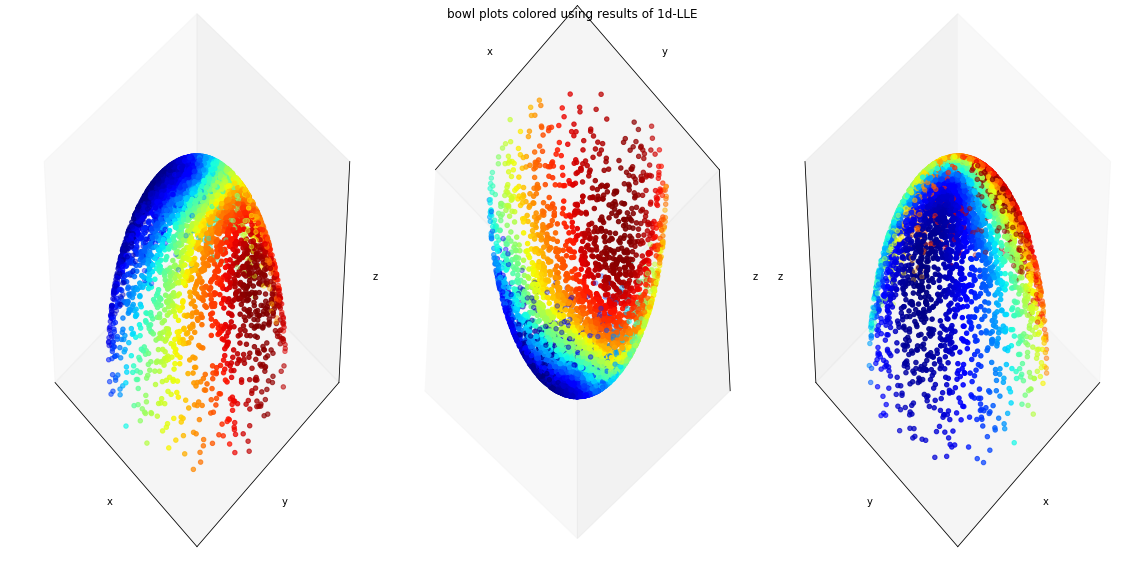

In [14]:
# using the results of the LLE for coloring the bowl:

fig = plt.figure(figsize=(16, 8))
for i_sub, angle in enumerate([[45, 135], [135, 45], [45, 45]]):
    plt.suptitle('bowl plots colored using results of 1d-LLE')
    ax = fig.add_subplot(1, 3, i_sub+1, projection='3d')
    ax.scatter(bowl[0], bowl[1], bowl[2],
               c=bowl_1d[0,:], cmap='jet')
    ax.view_init(elev=angle[0], azim=angle[1])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
plt.tight_layout()
plt.show()


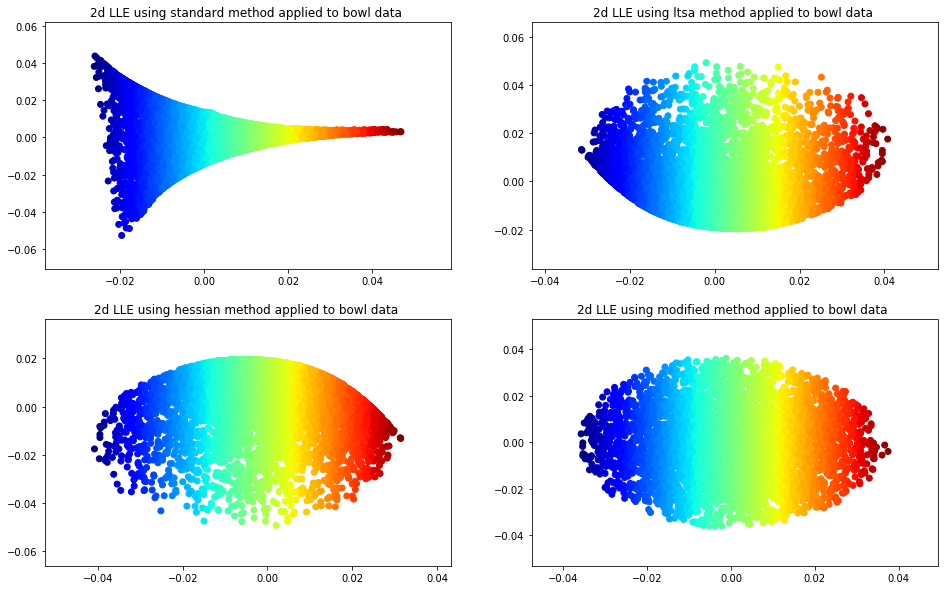

In [15]:
# M = 2 embedding dimensions for the bowl data
k_n = 10 # number of neighbors
n_dim = 2 # output dimension

plt.figure(figsize=(16, 10))
for isp, method in enumerate(['standard', 'ltsa', 'hessian', 'modified']):
    plt.subplot(2, 2, isp+1)
    LLE_method = manifold.LocallyLinearEmbedding(k_n, n_dim, method=method)
    bowl_2d = LLE_method.fit_transform(bowl.T).T
    plt.scatter(bowl_2d[0,:], bowl_2d[1,:], c=bowl_2d[0,:], cmap='jet')
    plt.title('{0}d LLE using {1} method applied to bowl data '.format(n_dim, method))
plt.show()
